### 20MAI0077 - Vivek Dadhich

### Github link - https://github.com/vivek20dadhich/CSE6037-Deep-Learning-and-its-Applications-Lab-Assignments

### Image Filtering using Convolution and entropy
<br></br>

In [1]:
#importing packages

import cv2
import numpy as np
import matplotlib.pyplot as plt

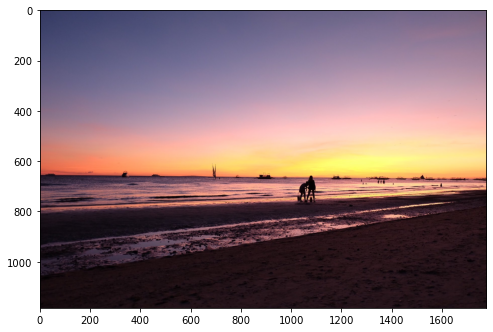

In [2]:
#loading image

img = cv2.imread('C:/Users/Vivek/Pictures/lilac.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(8,6))
plt.imshow(img)

### entropy of original image

In [3]:
import numpy as np
marg = np.histogramdd(np.ravel(img), bins = 256)[0]/img.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy = -np.sum(np.multiply(marg, np.log2(marg)))
entropy 

7.623996252432079

<br></br>

## 1. filter size (3**3) 

In [4]:
kernel_3 = np.ones((3, 3), np.float32)
kernel_3

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

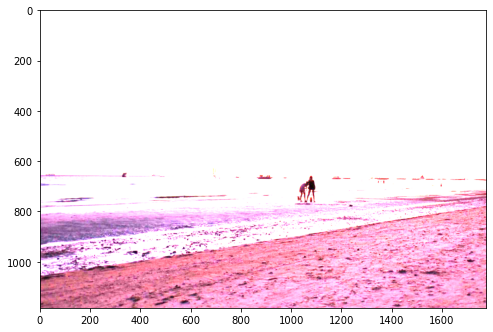

In [53]:
img_3 = cv2.filter2D(img, -1, kernel_3)
fig, ax = plt.subplots(1, figsize=(8,6))
plt.imshow(img_3)

### entropy of filtered image by 3*3 filter having stride = 1 and NO zero-padding

In [6]:
marg = np.histogramdd(np.ravel(img_3), bins = 256)[0]/img_3.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_3 = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_3

2.3679944747718116

<br></br>

## filter size 5*5

In [7]:
kernel_5 = np.ones((5, 5), np.float32)
kernel_5

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

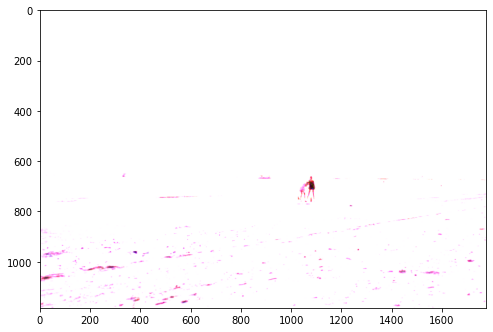

In [8]:
img_5 = cv2.filter2D(img, -1, kernel_5)
fig, ax = plt.subplots(1, figsize=(8,6))
plt.imshow(img_5)

### entropy of filtered image by 5*5 filter having stride = 1 and NO zero-padding

In [9]:
marg = np.histogramdd(np.ravel(img_5), bins = 256)[0]/img_5.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_5 = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_5

0.13134619423625635

<br></br>

## 2. filter size 3*3 and stride = 2 

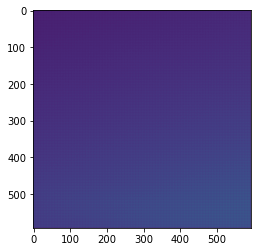

In [58]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_3_stride2 = np.zeros_like(img)

def convolve_stride(image, kernel, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2) / strides) + 1)
    output_3_stride2 = np.zeros((xOutput, yOutput))
    
 # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output_3_stride2[x, y] = (kernel * img[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output_3_stride2
                    
if __name__ == '__main__':
    # Grayscale Image
    image = img

    # Edge Detection Kernel
    kernel = kernel_3

    # Convolve and Save Output
    output_3_stride2 = convolve_stride(image, kernel)
    fig, ax = plt.subplots(1)
    plt.imshow(output_3_stride2)

### entropy of filtered image by 3*3 filter having stride = 2 and NO zero-padding

In [59]:
marg = np.histogramdd(np.ravel(output_3_stride2), bins = 256)[0]/output_3_stride2.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_3_stride = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_3_stride

2.6276640192217773

<br></br>

## filter size 5*5 and stride = 2

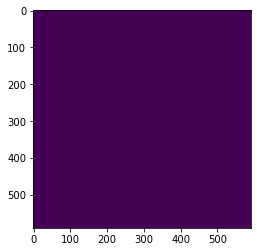

In [62]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_5_stride2 = np.zeros_like(img)

def convolve_stride(image, kernel, strides=2):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2) / strides) + 1)
    output_5_stride2 = np.zeros((xOutput, yOutput))
    
 # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output_5_stride2[x, y] = (kernel * img[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output_5_stride2
                    
if __name__ == '__main__':
    # Grayscale Image
    image = img

    # Edge Detection Kernel
    kernel = kernel_5

    # Convolve and Save Output
    output_5_stride2 = convolve_stride(image, kernel)
    fig, ax = plt.subplots(1)
    plt.imshow(output_5_stride2)

### entropy of filtered image by 5*5 filter having stride = 2 and NO zero-padding

In [64]:
marg = np.histogramdd(np.ravel(output_5_stride2), bins = 256)[0]/output_5_stride2.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_3_stride = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_3_stride

-0.0

<br></br>

## 3. filter size 3*3 and stride = 1, with Zero-padding

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

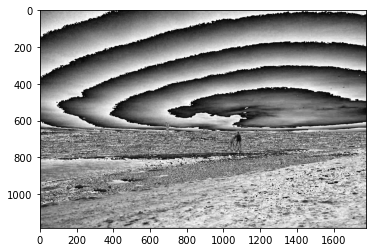

In [24]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_3 = np.zeros_like(img)

# Add zero padding to the input image
image_padded_3 = np.zeros((img_gray.shape[0] + 2, img_gray.shape[1] + 2))
image_padded_3 
image_padded_3[1:-1, 1:-1] = img_gray

 # Loop over every pixel of the image
for x in range(img_gray.shape[1]):
    for y in range(img_gray.shape[0]):
        # element-wise multiplication of the kernel and the image
        output_3[y, x]=(kernel_3 * image_padded_3[y: y+3, x: x+3]).sum()
plt.imshow(output_3)
kernel_3

### entropy of 3*3 filtered image with zero-padding

In [13]:
marg = np.histogramdd(np.ravel(output_3), bins = 256)[0]/output_3.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_3_padding = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_3_padding

7.970517047409606

<br></br>

## filter size 5*5 and stride = 1, with Zero-padding

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

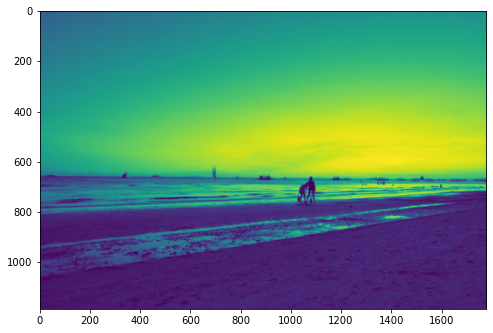

In [51]:
# Add zero padding to the input image
image_padded_5 = np.zeros((img_gray.shape[0] + 2, img_gray.shape[1] + 2))
image_padded_5[1:-1, 1:-1] = img_gray

#5*5 filter with zero padding
output_5 = cv2.filter2D(image_padded_5, -1, kernel_5)
fig, ax = plt.subplots(1, figsize=(8,6))
plt.imshow(output_5)
kernel_5

### entropy of 5*5 filtered image with zero-padding

In [16]:
marg = np.histogramdd(np.ravel(output_5), bins = 256)[0]/output_5.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy_3_padding = -np.sum(np.multiply(marg, np.log2(marg)))
entropy_3_padding

7.598464430939949

## entropy

In [17]:
#Entropy is a measure of image information content, which is interpreted as the average uncertainty of information source. 
#In Image, Entropy is defined as corresponding states of intensity level which individual pixels can adapt. 
#It is used in the quantitative analysis and evaluation image details, 
#the entropy value is used as it provides better comparison of the image details.